# imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis

# load Your Dataset

In [3]:
df = pd.read_csv("C:/Users/YeldiR/Time_Series/data-science-statistics-journey/dataset/Titanic-Dataset.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# measures_of_central_tendency
<b>Mean</b>, <b>Median</b> and <b>Mode</b>

In [5]:
df['Age'].mean()

np.float64(29.69911764705882)

In [6]:
df['Age'].median()

np.float64(28.0)

In [7]:
df['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

In [8]:
df['Sex'].mode()

0    male
Name: Sex, dtype: object

# measures_of_dispersion
<b>RANGE</b>, <b>IQR</b>,<b>Identifying outliers using IQR</b>, <b>VARIANCE</b>, <b>Standard Deviation</b> and <b>Mean Absolute Deviation and Coefficient of Variation</b>

In [9]:
# RANGE
age_max = df['Age'].max()
age_min = df['Age'].min()
print(age_max,age_min)
age_range = age_max-age_min
print(age_range)

80.0 0.42
79.58


In [10]:
# IQR
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
print('q1',q1,'q3',q3)
iqr = q3-q1
print(iqr) #how spread out the middle 50% of the data is.

q1 20.125 q3 38.0
17.875


In [11]:
#Identifying outliers using IQR
low_bound_age = df['Age']-1.5*iqr
upper_bound_age = df['Age']+1.5*iqr
outliers_age = df[(df['Age']<low_bound_age) | (df['Age']>upper_bound_age)]
outliers_age['Age']

Series([], Name: Age, dtype: float64)

In [12]:
#Identifying outliers using IQR
low_bound_fare = df['Fare']-1.5*iqr
upper_bound_fare = df['Fare']+1.5*iqr
outliers_fare = df[(df['Fare']<low_bound_age) | (df['Fare']>upper_bound_age)]
outliers_fare['Fare']

1      71.2833
4       8.0500
11     26.5500
15     16.0000
16     29.1250
        ...   
860    14.1083
865    13.0000
872     5.0000
873     9.0000
879    83.1583
Name: Fare, Length: 217, dtype: float64

In [13]:
q2 = df['Age'].quantile(0.50)
q2 #median value

np.float64(28.0)

In [14]:
"""
Standard Deviation
#mean was 35 and std is 14 it indicates that most ages fall between 21 and 49 (that’s 35 ± 14).
"""
df['Age'].std()


np.float64(14.526497332334042)

In [15]:
#Variance= STD**2. Example,14.52..**2=196 ≈ 211. It also measures spread, but in squared units,
df['Age'].var()

np.float64(211.01912474630802)

In [16]:
"""
Mean Absolute Deviation 
It means that on average, each passenger’s age is about 11.32 years different from the average age of all passengers.
"""
df_age_fare = df[['Age','Fare']]
titanic_clean = df_age_fare.dropna() # Drop missing values
mad = (titanic_clean - titanic_clean.mean()).abs().mean()
print("Mean Absolute Deviation (MAD):\n", mad)

Mean Absolute Deviation (MAD):
 Age     11.322944
Fare    30.281589
dtype: float64


In [17]:
# Calculate Coefficient of Variation(CV)
cv = titanic_clean.std() / titanic_clean.mean()
print("\nCoefficient of Variation (CV):\n", cv)


Coefficient of Variation (CV):
 Age     0.489122
Fare    1.525282
dtype: float64


<b> for example </b>

| Dataset Description     | Data Points                    | CV Value | Interpretation           |
|-------------------------|--------------------------------|----------|---------------------------|
| Low dispersion          | [50, 52, 49, 51, 50]           | 0.02     | Very consistent data      |
| Moderate dispersion     | [30, 45, 60, 40, 55]           | 0.23     | Moderate variability      |
| High dispersion         | [10, 100, 5, 200, 50]          | 0.99     | Highly variable data      |


# measures_of_shape 
<b>skewness and kurtosis</b>

## Skewness

### Manual data

In [18]:
"""
General rule of thumb
skewness ~ 0 symmetrical distribution
skewness > 0 right skewed
skewness < 0 left skewed
"""
data = [[10, 18, 11], [13, 15, 8], [9, 20, 3]]
df_skew = pd.DataFrame(data)
print(df_skew.skew())


0    1.293343
1   -0.585583
2   -0.722109
dtype: float64


### Titanic

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Skewness values for numerical features:
 Age     0.388290
Fare    4.643848
dtype: float64


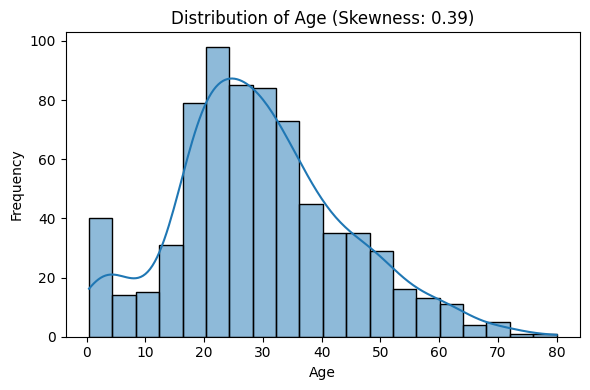

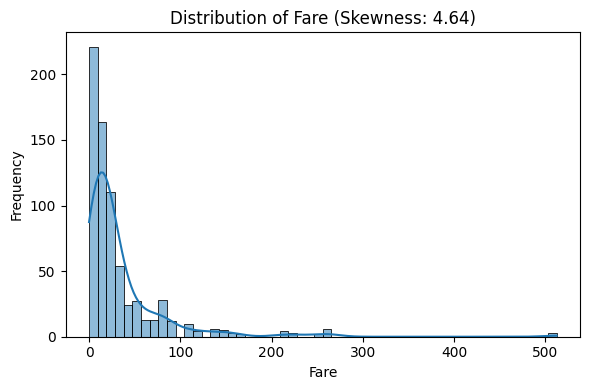

In [20]:
#Select your columns to calculate skewness and plot
data_skew= df[['Age','Fare']].dropna()

# Calculate skewness for each column
skewness_values = data_skew.apply(skew)

# Print skewness values
print("Skewness values for numerical features:\n", skewness_values)

# Visualize the distribution of numerical features
for col in data_skew.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_skew[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness_values[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## Kurtosis

### Manual

In [21]:
# Creating a dataset
dataset = [88, 85, 82, 97, 67, 77, 74, 86,
           81, 95, 77, 88, 85, 76, 81]

# Calculate the kurtosis
print(kurtosis(dataset, axis=0, bias=True))

-0.29271198374234686


### Titanic

Excess Kurtosis values for numerical features:
 Age      0.168637
Fare    30.699725
dtype: float64


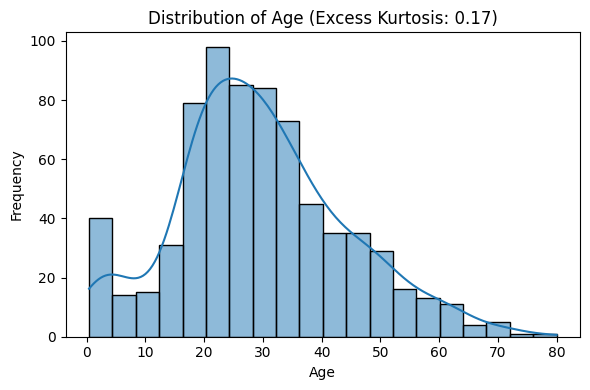

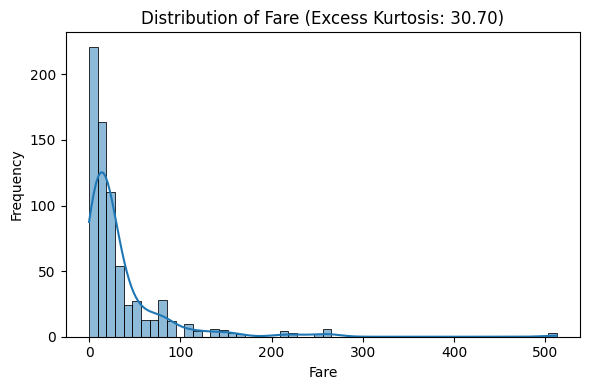

In [22]:
#Select your columns to calculate skewness and plot
df_kurtosis = df[['Age','Fare']].dropna()

# Calculate skewness for each column
kurtosis_values = df_kurtosis.apply(kurtosis)

# Print kurtosis values
print("Excess Kurtosis values for numerical features:\n", kurtosis_values)

# Visualize the distribution of numerical features with kurtosis
for col in df_kurtosis:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_kurtosis[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Excess Kurtosis: {kurtosis_values[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# graphical_representations

## manual

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 10.,  21.,  32.,  43.,  54.,  65.,  76.,  87.,  98., 109., 120.]),
 <BarContainer object of 10 artists>)

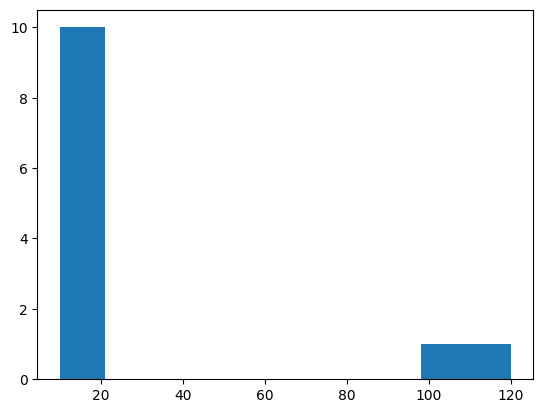

In [39]:
%matplotlib inline
dataset=[11,10,12,13,14,12,11,12,13,16,17,19,10,120,105,12,12,15,16,17,18,19,13,14,11,11,10]
plt.hist(data)

In [40]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [41]:
detect_outliers(dataset)

[120, 105]

<Axes: >

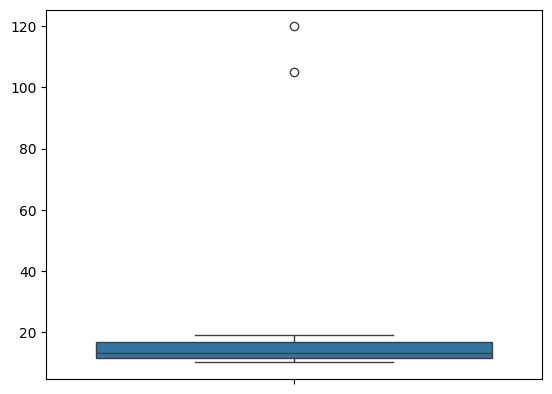

In [44]:
sns.boxplot(dataset)

## Titanic

<Axes: ylabel='Age'>

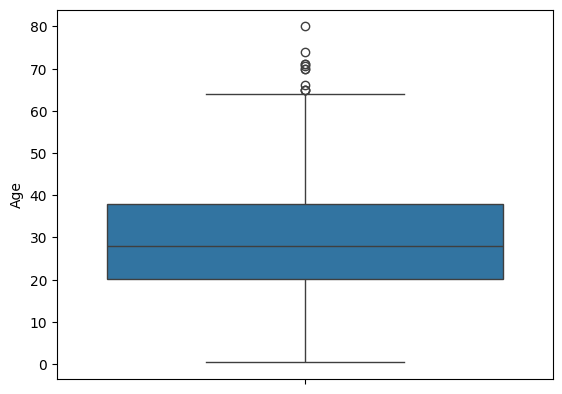

In [49]:
sns.boxplot(df['Age'])

<Axes: ylabel='Fare'>

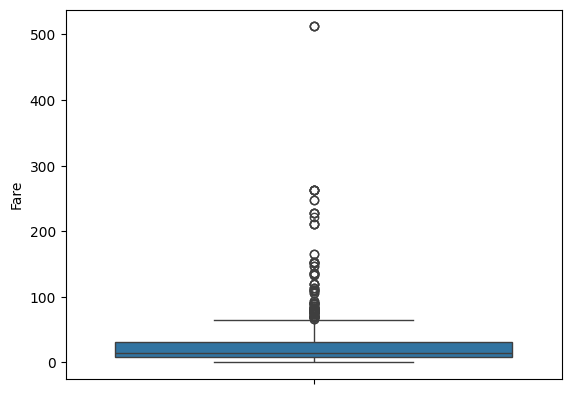

In [52]:
sns.boxplot(df['Fare'])